# Python for Mechanical Engineers

In [19]:
# source: http://ifcuriousthenlearn.com/blog/2015/06/09/mechanical-vibrations-with-python/


## Mechanical Vibrations with Python

Solving second-order differential equations is a common problem in mechanical engineering, and although it is improtant to understand how to solve these problems analytically, using software to solve them is mor practical, especially when considering the parameters are often unknown and need to be tested.

This is a simple example of solving a second-order differential equation representing a spring-damper system with python programming language. Python is a powerful tool for science and engineering and is relativley easy to use and free!

The system that this is modeling is based on a spring and damper in parallel attached to a mass.

![](https://moorepants.github.io/resonance/07/quarter-car.jpg) 


![](http://upload.wikimedia.org/wikipedia/en/7/79/Mass_spring_damper.png)

In [21]:
import matplotlib.pylab as pylab

# forces plots to appear in the ipython notebook
%matplotlib inline

from scipy.integrate import odeint
from pylab import plot,xlabel,ylabel,title,legend,figure,subplots

from pylab import cos, pi, arange, sqrt, pi, array, array

In [22]:
def MassSpringDamper(state,t):
    '''
    k=spring constant, Newtons per metre
    m=mass, Kilograms
    c=dampign coefficient, Newton*second / meter    
    
    for a mass,spring
        xdd = ((-k*x)/m) + g
    for a mass, spring, damper 
        xdd = -k*x/m -c*xd-g
    for a mass, spring, dmaper with forcing function
        xdd = -k*x/m -c*xd-g + cos(4*t-pi/4)
    '''
  
    k=124e3  # spring constant, kN/m
    m=64.2 # mass, Kg
    c=3  # damping coefficient 
    # unpack the state vector
    x,xd = state # displacement,x and velocity x'
    g = 9.8 # metres per second**2
    # compute acceleration xdd = x''
    omega = 1.0 # frequency
    phi = 0.0 # phase shift
    A = 5.0 # amplitude
    xdd = -k*x/m -c*xd-g + A*cos(2*pi*omega*t - phi)
    return [xd, xdd]

The initial displacement and velocity conditions are defined in the varaible state0

In [23]:
state0 = [0.0, 1.2]  #initial conditions [x0 , v0]  [m, m/sec] 
ti = 0.0  # initial time
tf = 4.0  # final time
step = 0.001  # step
t = np.arange(ti, tf, step)
state = odeint(MassSpringDamper, state0, t)
x = array(state[:,[0]])
xd = array(state[:,[1]])

Solving a differential equation is challenging enough, but for me, it isn't all that useful unless you have some nice plots to visualize the results

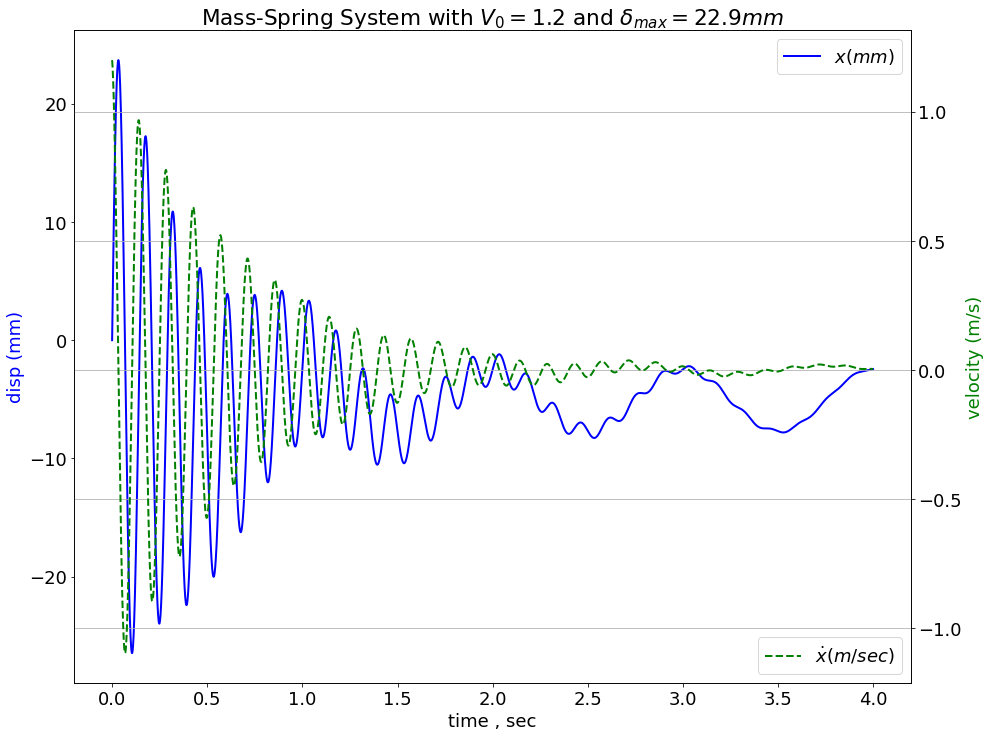

In [24]:
# Plotting displacement and velocity
pylab.rcParams['figure.figsize'] = (15, 12)
pylab.rcParams['font.size'] = 18

fig, ax1 = pylab.subplots()
ax2 = ax1.twinx()
ax1.plot(t,x*1e3,'b',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t,xd,'g--',label = r'$\dot{x} (m/sec)$', linewidth=2.0)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='b')
ax2.set_ylabel('velocity (m/s)',color='g')
pylab.title('Mass-Spring System with $V_0=1.2 \frac{m}{s}$ and $\delta_{max}=22.9mm$')
pylab.grid()